In [5]:
import json
import random
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with open(os.path.join("data", "train", "coco_annotations.json"), "r") as f:
    coco_data = json.load(f)

In [7]:
annotations_with_bbox = [anno for anno in coco_data["annotations"] if anno["area"]]
annotations_without_bbox = [anno for anno in coco_data["annotations"] if not anno["area"]]
selected_with_bbox = random.sample(annotations_with_bbox, 8)
selected_without_bbox = random.sample(annotations_without_bbox, 4)
selected_annotations = selected_with_bbox + selected_without_bbox

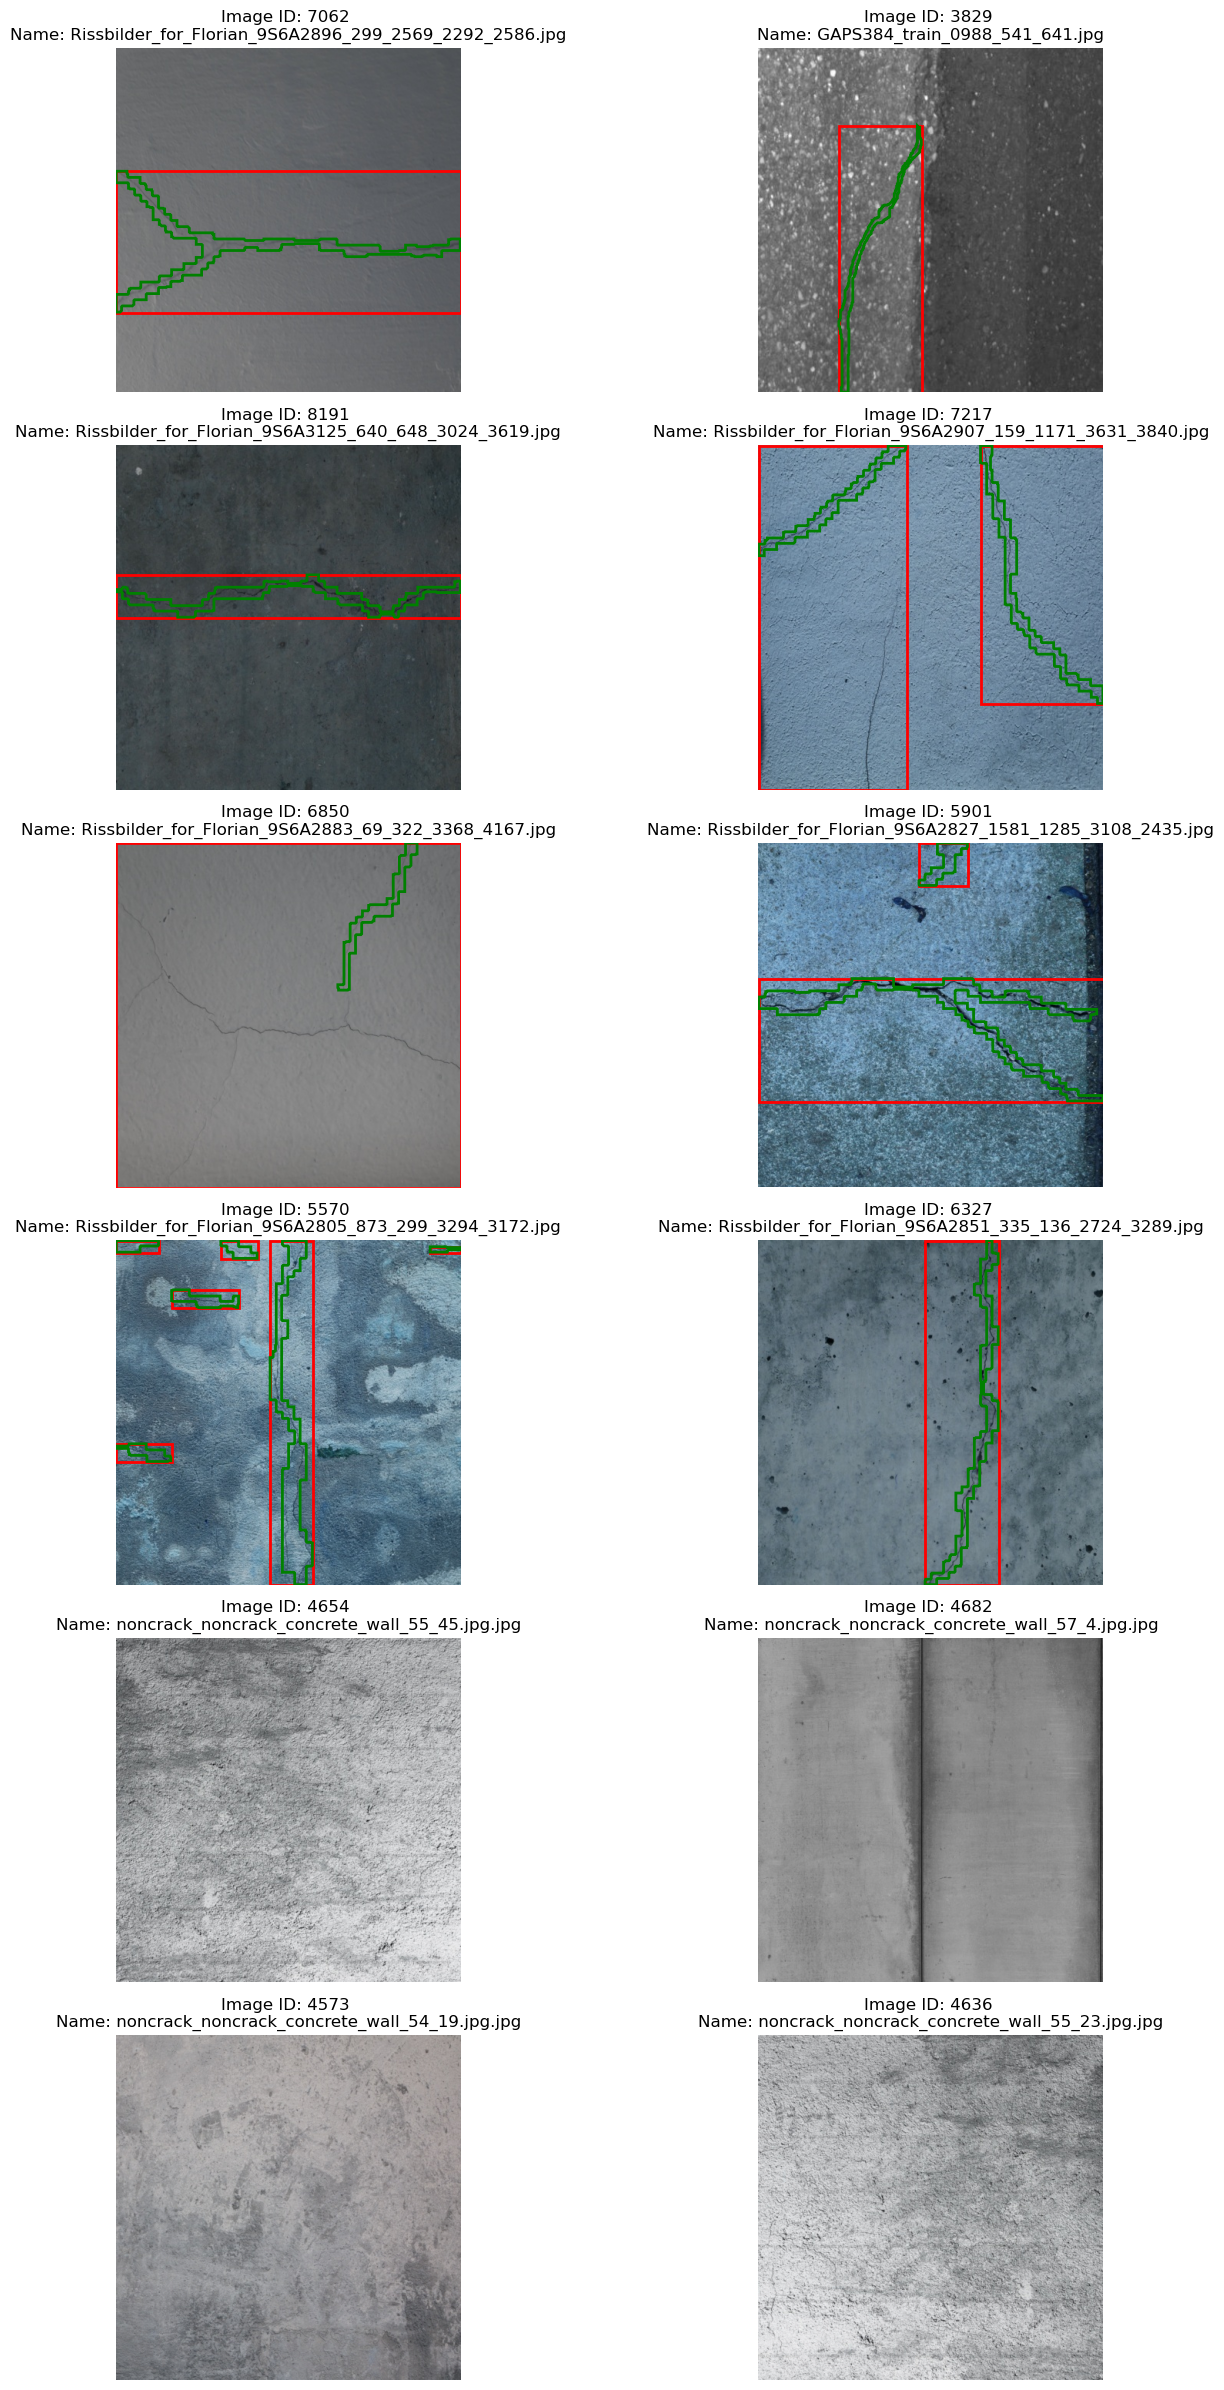

In [8]:
images_dir = os.path.join("data", "train", "images")
rows, cols = 6, 2
subplot_width, subplot_height = 400, 400
figure_width = subplot_width * cols * 2 / 100
figure_height = subplot_height * rows / 100

plt.figure(figsize=(figure_width, figure_height))

for idx, annotation in enumerate(selected_annotations):
    plt.subplot(rows, cols, idx + 1)

    image_id = annotation["image_id"]
    image_info = next(img for img in coco_data["images"] if img["id"] == image_id)
    image_path = os.path.join(images_dir, image_info["file_name"])
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)

    image_annotations = [anno for anno in coco_data["annotations"] if anno["image_id"] == image_id]

    for anno in image_annotations:
        if anno["bbox"]:
            x, y, w, h = anno["bbox"]
            plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', linewidth=2))

        if anno["segmentation"]:
            for seg in anno["segmentation"]:
                seg_np = np.array(seg).reshape((-1, 2))
                plt.gca().add_patch(plt.Polygon(seg_np, edgecolor='g', facecolor='none', linewidth=2))

    plt.title(f"Image ID: {image_id} \nName: {image_info['file_name']}")
    plt.axis("off")

plt.tight_layout()
plt.show()